# Dynamical Power Spectra (on fake data)

In [6]:
%matplotlib inline

In [7]:
# import some modules
import numpy as np
import matplotlib.pyplot as plt
import stingray
stingray.__version__

'2.0.0rc2.dev9+gac076c56'

In [8]:
# choose style of plots, `seaborn-talk` produce nice big figures
plt.style.use('seaborn-v0_8-talk')

## Generate a fake lightcurve

In [9]:
# Array of timestamps, 10000 bins from 1s to 100s
times = np.linspace(1,100,10000)

# base component of the lightcurve, poisson-like
# the averaged count-rate is 100 counts/bin
noise = np.random.poisson(100,10000)

# time evolution of the frequency of our fake periodic signal
# the frequency changes with a sinusoidal shape around the value 24Hz
freq = 25 + 1.2*np.sin(2*np.pi*times/130)

# Our fake periodic variability with drifting frequency
# the amplitude of this variability is 10% of the base flux
var = 10*np.sin(2*np.pi*freq*times)

# The signal of our lightcurve is equal the base flux plus the variable flux
signal = noise+var

In [10]:
# Create the lightcurve object
lc = stingray.Lightcurve(times, signal)

2024-02-15 18:17:26,174 - stingray.loggingconfig - INFO - Checking if light curve is well behaved. This can take time, so if you are sure it is already sorted, specify skip_checks=True at light curve creation. (lightcurve.py:486)
2024-02-15 18:17:26,237 - stingray.loggingconfig - INFO - Checking if light curve is sorted. (lightcurve.py:521)
2024-02-15 18:17:26,301 - stingray.loggingconfig - INFO - Computing the bin time ``dt``. This can take time. If you know the bin time, please specify it at light curve creation (lightcurve.py:294)
C:\Users\tarui\OneDrive\Desktop\Stingray\stingray\stingray\lightcurve.py:328: UserWarning: On Windows, the size of an integer is 32 bits. To avoid integer overflow, I'm converting the input array to float
  warnings.warn(


### Visualizing the lightcurve

<Axes: title={'center': 'Lightcurve'}, xlabel='Time (s)', ylabel='Counts / bin'>

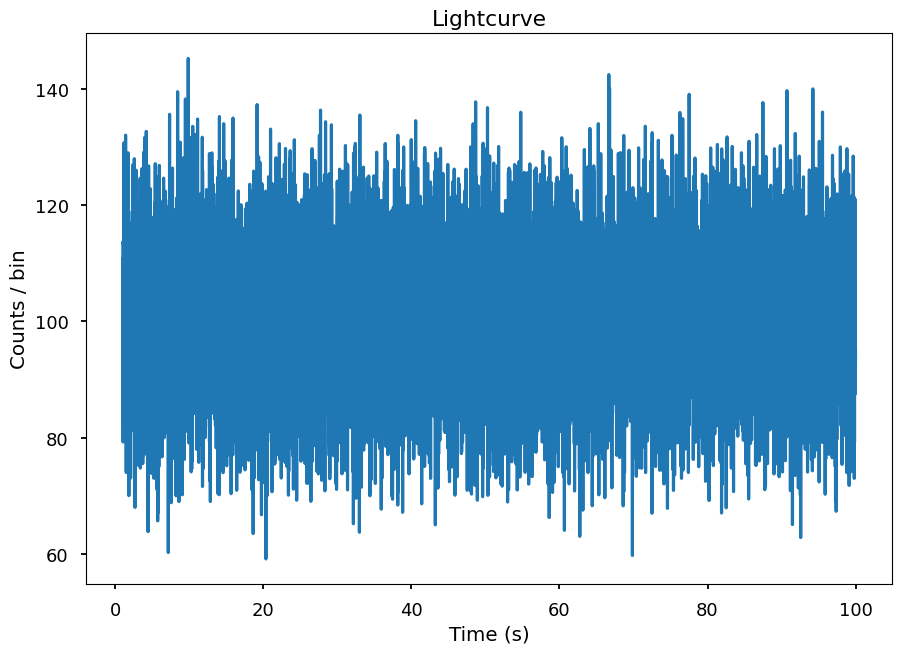

In [11]:
lc.plot(labels=['Time (s)', 'Counts / bin'], title="Lightcurve")

### Zomming in..

<Axes: title={'center': 'Zoomed in Lightcurve'}, xlabel='Time (s)', ylabel='Counts / bin'>

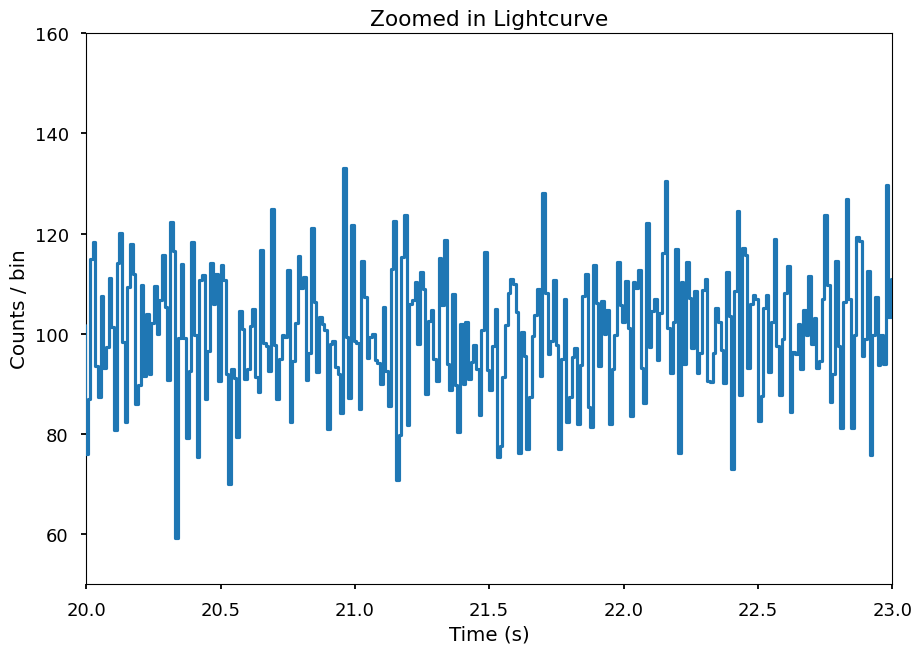

In [12]:
lc.plot(labels=['Time (s)', 'Counts / bin'], axis=[20,23,50,160], title='Zoomed in Lightcurve')

# A power spectrum of this lightcurve..

In [13]:
ps = stingray.AveragedPowerspectrum(lc, segment_size=3, norm='leahy')

33it [00:00, 11228.36it/s]


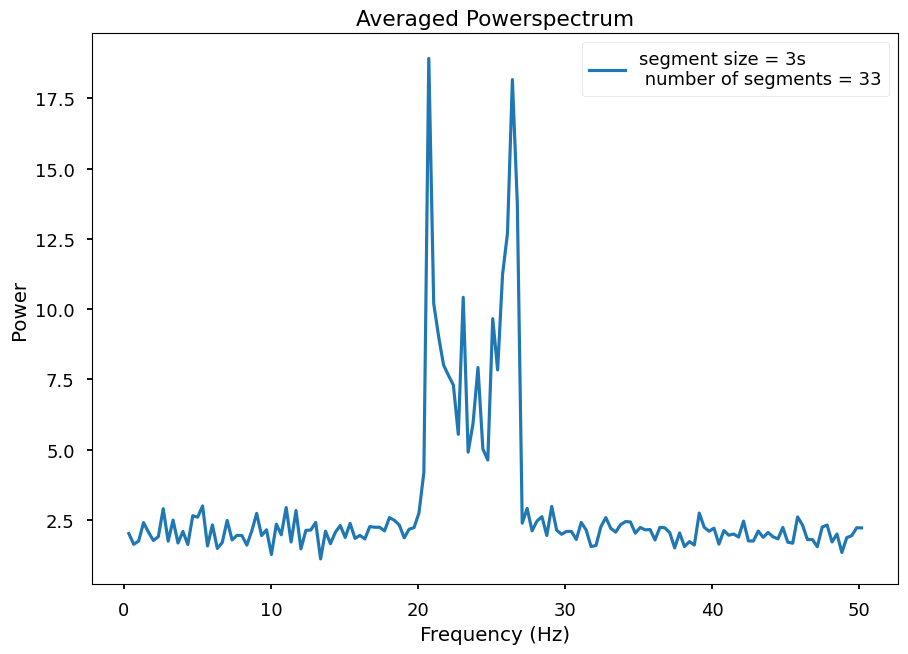

In [14]:
plt.plot(ps.freq, ps.power, label='segment size = {}s \n number of segments = {}'.format(3, int(lc.tseg/3)))
plt.title('Averaged Powerspectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()

## It looks like we have at least 2 frequencies. 
# Let's look at the Dynamic Powerspectrum..

In [15]:
dps = stingray.DynamicalPowerspectrum(lc, segment_size=3)

33it [00:00, ?it/s]


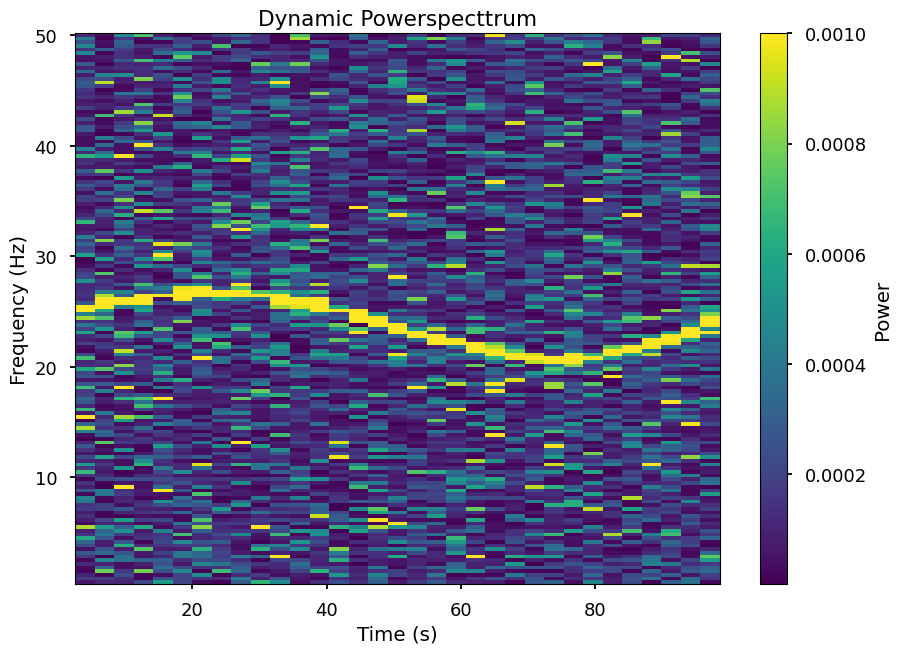

In [16]:
extent = min(dps.time), max(dps.time), min(dps.freq), max(dps.freq)
plt.imshow(dps.dyn_ps, aspect="auto", origin="lower", vmax=0.001,
           interpolation="none", extent=extent)
plt.title('Dynamic Powerspecttrum')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power')

## It is actually only one feature drifiting along time

 # Rebinning in Frequency

In [17]:
print("The current frequency resolution is {}".format(dps.df))

The current frequency resolution is 0.33443708609262496


Let's rebin to a frequency resolution of 1 Hz and using the average of the power

In [18]:
dps_new_f = dps.rebin_frequency(df_new=1.0, method="average")

In [19]:
print("The new frequency resolution is {}".format(dps_new_f.df))

The new frequency resolution is 1.0


Let's see how the Dynamical Powerspectrum looks now

(15.0, 30.0)

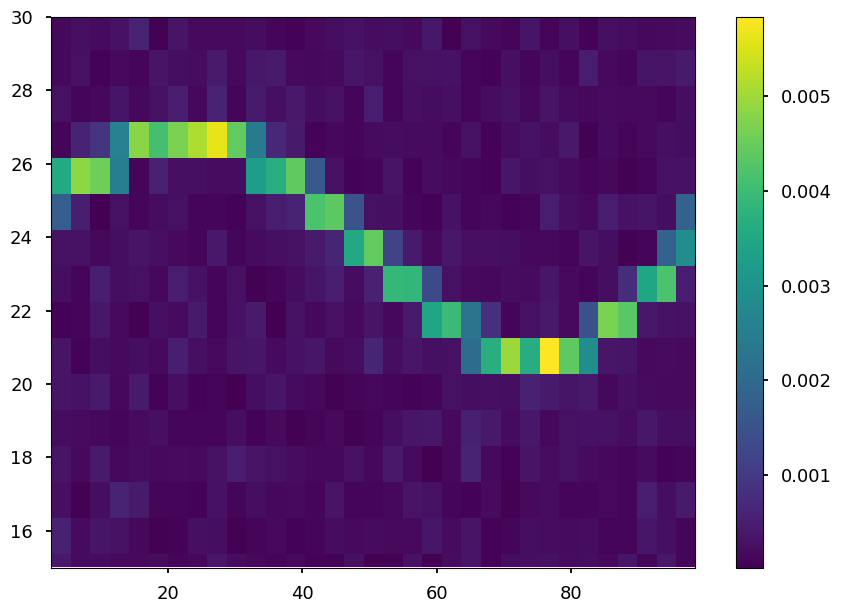

In [20]:
extent = min(dps_new_f.time), max(dps_new_f.time), min(dps_new_f.freq), max(dps_new_f.freq)
plt.imshow(dps_new_f.dyn_ps, origin="lower", aspect="auto",
           interpolation="none", extent=extent)
plt.colorbar()
plt.ylim(15, 30)

# Rebin time

Let's  rebin our matrix in the time axis

In [21]:
print("The current time resolution is {}".format(dps.dt))

The current time resolution is 3


Let's rebin to a time resolution of 4 s

In [22]:
dps_new_t = dps.rebin_time(dt_new=6.0, method="average")

In [23]:
print("The new time resolution is {}".format(dps_new_t.dt))

The new time resolution is 6.0


(15.0, 30.0)

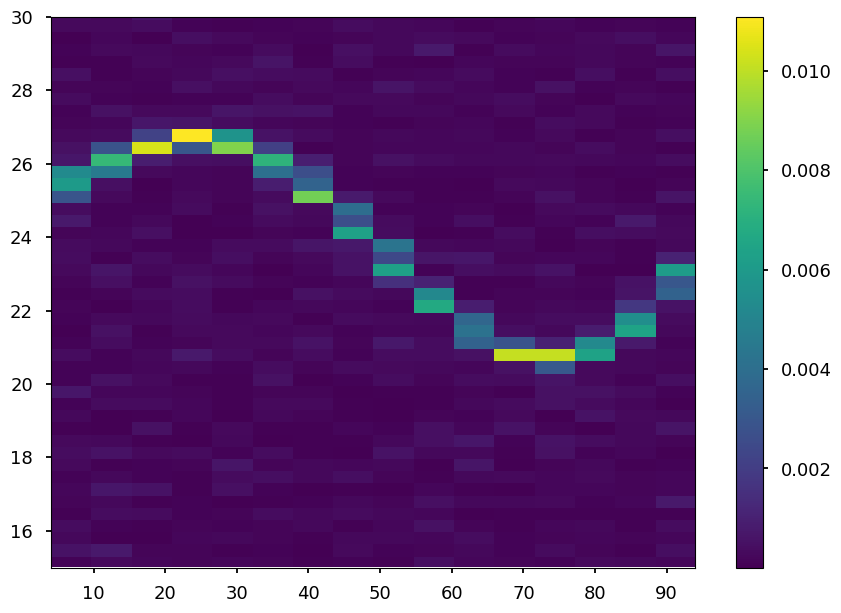

In [24]:
extent = min(dps_new_t.time), max(dps_new_t.time), min(dps_new_t.freq), max(dps_new_t.freq)
plt.imshow(dps_new_t.dyn_ps, origin="lower", aspect="auto",
           interpolation="none", extent=extent)
plt.colorbar()
plt.ylim(15,30)

## Let's trace that drifiting feature.

In [25]:
# By looking into the maximum power of each segment
max_pos = dps.trace_maximum()

Text(0.5, 1.0, 'Detected frequency drift')

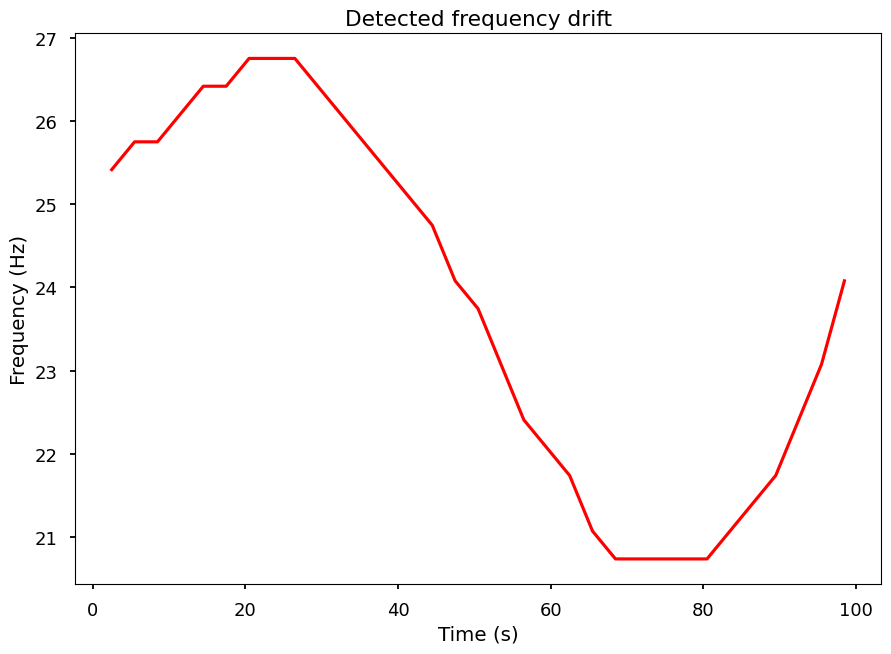

In [26]:
plt.plot(dps.time, dps.freq[max_pos], color='red', alpha=1)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Detected frequency drift')

# Overlaying this traced function with the Dynamical Powerspectrum

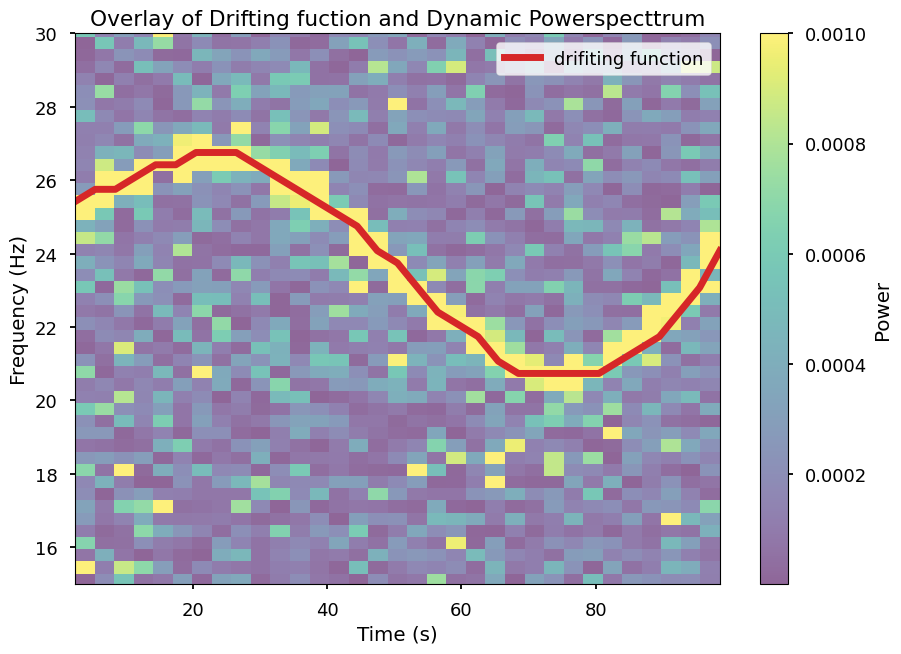

In [27]:
extent = min(dps.time), max(dps.time), min(dps.freq), max(dps.freq)
plt.imshow(dps.dyn_ps, aspect="auto", origin="lower", vmax=0.001,
           interpolation="none", extent=extent, alpha=0.6)
plt.plot(dps.time, dps.freq[max_pos], color='C3', lw=5, alpha=1, label='drifiting function')

plt.ylim(15,30) # zoom-in around 24 hertz

plt.title('Overlay of Drifting fuction and Dynamic Powerspecttrum')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power')
plt.legend()